In [1]:
import pandas as pd
import numpy as np
import os

#for visualizinng and analyzing it
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#random forest model training
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import LocalOutlierFactor

In [2]:
# loading data
data = pd.read_csv('D:/Data Science Work/Datasets/porter_data.csv')

In [3]:
# convering data into dataframe
dataf = pd.DataFrame(data)
print(dataf.shape)

(175777, 14)


In [4]:
# creating a copy of original data
datatable = dataf.copy()

In [5]:
# first five rows of our dataset to see the information in our data
datatable.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [6]:
# first five rows of our dataset
datatable.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [7]:
# matadata
datatable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17

In [8]:
# columns in our datasets
datatable.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [9]:
# checking for null values in our dataset
datatable.isnull().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
dtype: int64

In [10]:
# parsing the date and time columns
datatable['created_at']=pd.to_datetime(datatable['created_at'])
datatable['actual_delivery_time']=pd.to_datetime(datatable['actual_delivery_time'])

In [11]:
# checking if the columns has been parsed
# we will do so in further steps too
datatable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     175777 non-null  float64       
 1   created_at                                    175777 non-null  datetime64[ns]
 2   actual_delivery_time                          175777 non-null  datetime64[ns]
 3   store_primary_category                        175777 non-null  int64         
 4   order_protocol                                175777 non-null  float64       
 5   total_items                                   175777 non-null  int64         
 6   subtotal                                      175777 non-null  int64         
 7   num_distinct_items                            175777 non-null  int64         
 8   min_item_price                                175777 n

In [12]:
# creating the target column -> time taken
datatable['time_taken'] = datatable['actual_delivery_time'] - datatable['created_at']

In [13]:
# changing the time taken into minutes
datatable['time_taken_mins'] = pd.to_timedelta(datatable['time_taken'])/pd.Timedelta('60s')

In [14]:
# extracting day and hours from the order creation time
datatable['hour']=datatable['created_at'].dt.hour
datatable['day']=datatable['created_at'].dt.dayofweek

In [15]:
# dropping the column that we no longer need
datatable.drop(['time_taken','created_at', 'actual_delivery_time'],axis=1, inplace= True)

In [16]:
datatable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   store_primary_category                        175777 non-null  int64  
 2   order_protocol                                175777 non-null  float64
 3   total_items                                   175777 non-null  int64  
 4   subtotal                                      175777 non-null  int64  
 5   num_distinct_items                            175777 non-null  int64  
 6   min_item_price                                175777 non-null  int64  
 7   max_item_price                                175777 non-null  int64  
 8   total_onshift_dashers                         175777 non-null  float64
 9   total_busy_dashers                            17

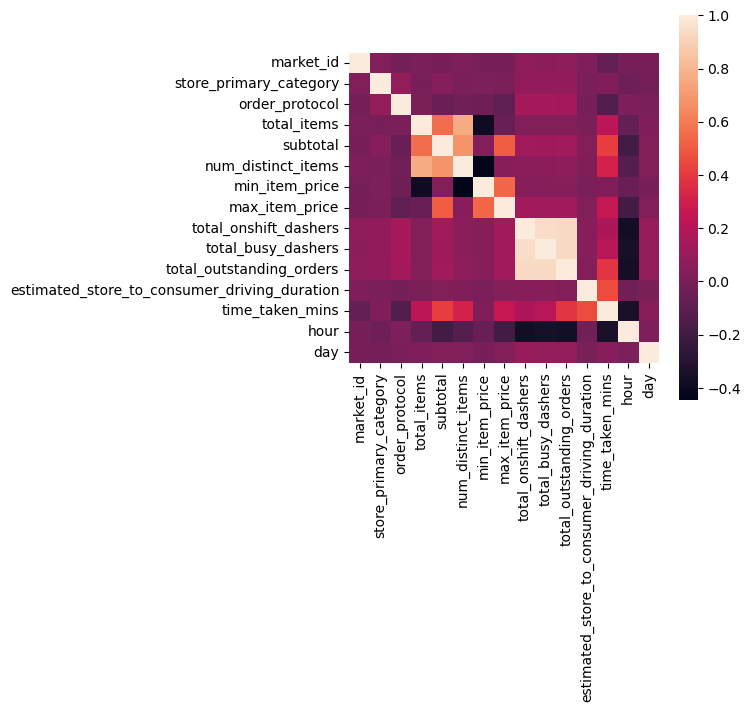

In [17]:
# plotting corrrelation to understand the data
plt.figure(figsize=(5,5))
sns.heatmap(datatable.corr(),square = True)
plt.show()

<Axes: xlabel='time_taken_mins', ylabel='subtotal'>

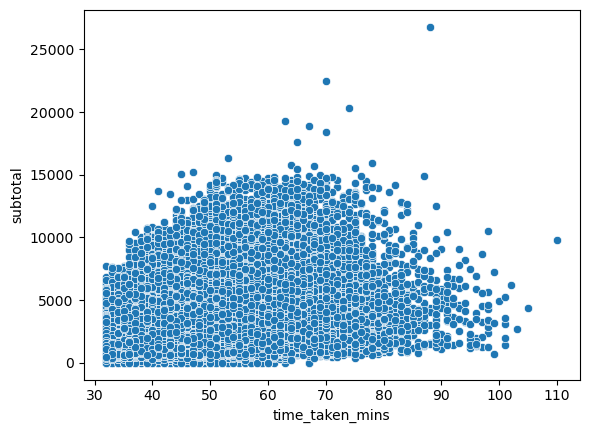

In [48]:
sns.scatterplot(x='time_taken_mins',y='subtotal',data=datatable)

In [19]:
# converting categorical column into integer
# before removing the outliers and
# to make the modelling process easy
datatable['store_primary_category'] = datatable['store_primary_category'].astype('category').cat.codes

<Axes: xlabel='day', ylabel='count'>

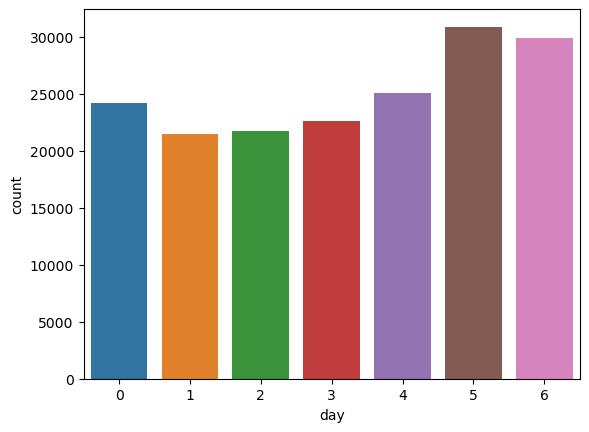

In [20]:
# plotting a cound plot to look at
# the no of orders on each day
sns.countplot(x=datatable.day)

<Axes: xlabel='hour', ylabel='count'>

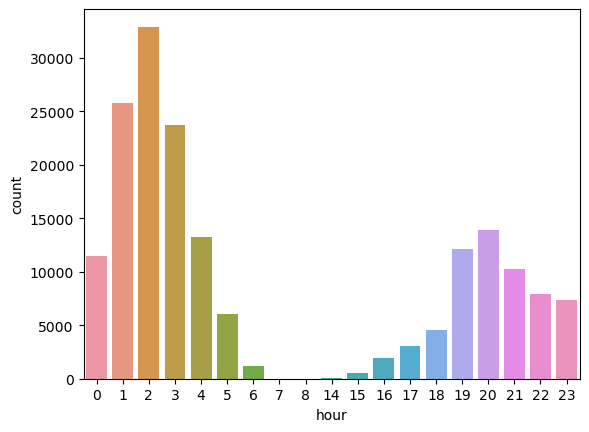

In [49]:
# count plot of hours or checking no. of orders/hour
sns.countplot(x=datatable.hour)

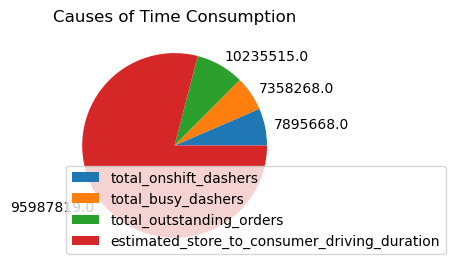

In [46]:
#causes of time consumptions
factors = ['total_onshift_dashers',
           'total_busy_dashers',
           'total_outstanding_orders',
           'estimated_store_to_consumer_driving_duration']

estimated_time_cause = [datatable[factor].sum() for factor in factors]

plt.figure(figsize=(3,3))
plt.pie(estimated_time_cause,labels=estimated_time_cause)
plt.title("Causes of Time Consumption")
plt.legend(factors)
plt.show()

In [21]:
# redefinin columns for data splitting
data_cols = list(datatable.columns)
data_cols

['market_id',
 'store_primary_category',
 'order_protocol',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'estimated_store_to_consumer_driving_duration',
 'time_taken_mins',
 'hour',
 'day']

In [24]:
data_cols.remove('time_taken_mins')

In [26]:
# data columns
values = datatable[data_cols]
values

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,22,4
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,21,1
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,0
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,3
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,1.0,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0,0,1
175773,1.0,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0,0,4
175774,1.0,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0,4,5
175775,1.0,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0,18,6


In [28]:
#target column
target = datatable['time_taken_mins']
target

0         47.0
1         44.0
2         55.0
3         59.0
4         46.0
          ... 
175772    43.0
175773    62.0
175774    46.0
175775    45.0
175776    37.0
Name: time_taken_mins, Length: 175777, dtype: float64

In [29]:
# splitting the train test values
values_train,values_test,target_train,target_test = train_test_split(values,target,test_size=0.10,random_state=100)

In [30]:
values_train

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day
31594,2.0,36,1.0,2,2398,2,1099,1299,56.0,56.0,80.0,884.0,3,2
126211,1.0,38,5.0,3,4628,3,1383,1513,42.0,48.0,43.0,286.0,19,5
143400,4.0,20,4.0,3,1860,2,195,670,16.0,12.0,13.0,1027.0,1,3
18951,1.0,13,1.0,2,2500,1,950,950,13.0,14.0,21.0,184.0,4,0
174103,2.0,4,1.0,1,1099,1,1099,1099,114.0,101.0,159.0,516.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,3.0,15,1.0,1,895,1,895,895,4.0,2.0,1.0,404.0,20,3
65615,2.0,58,5.0,7,3894,6,100,1221,64.0,60.0,64.0,566.0,23,6
77655,2.0,4,5.0,17,448,3,0,289,39.0,43.0,50.0,516.0,5,1
56088,2.0,55,3.0,2,3000,2,400,1500,44.0,43.0,63.0,541.0,19,4


In [31]:
values_test

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day
139667,1.0,45,1.0,3,1295,2,150,995,59.0,59.0,61.0,514.0,3,4
80077,1.0,4,1.0,2,2950,1,1225,1225,18.0,17.0,16.0,321.0,1,5
41872,1.0,46,4.0,1,1395,1,1395,1395,28.0,27.0,45.0,420.0,3,3
165269,4.0,24,5.0,2,2967,2,1097,1249,124.0,127.0,200.0,475.0,3,5
151215,4.0,6,2.0,3,1250,2,375,400,39.0,30.0,33.0,668.0,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117966,2.0,55,5.0,2,1550,2,700,850,52.0,57.0,81.0,315.0,5,6
111600,2.0,10,3.0,3,2890,3,600,1295,63.0,63.0,88.0,756.0,1,3
29387,1.0,38,3.0,3,6350,3,1650,2950,56.0,56.0,75.0,219.0,2,6
63625,2.0,50,3.0,1,1775,1,1175,1175,20.0,19.0,30.0,431.0,22,0


In [32]:
target_train

31594     55.0
126211    34.0
143400    52.0
18951     48.0
174103    48.0
          ... 
82270     37.0
65615     36.0
77655     36.0
56088     44.0
38408     42.0
Name: time_taken_mins, Length: 158199, dtype: float64

In [33]:
target_test

139667    39.0
80077     42.0
41872     48.0
165269    55.0
151215    37.0
          ... 
117966    41.0
111600    52.0
29387     49.0
63625     38.0
10750     37.0
Name: time_taken_mins, Length: 17578, dtype: float64

In [44]:
# applying the RandomForest model
regressor=RandomForestRegressor(n_estimators=100,
                                  random_state=0)
regressor.fit(values_train,target_train)

RandomForestRegressor(random_state=0)

In [35]:
# checking for the errors
prediction=regressor.predict(values_test)
mse=mean_squared_error(target_test,prediction)
rmse=mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
mae=mean_absolute_error(target_test,prediction)
print("mase : ",mae)

mse :  3.2947045738991925
rmse :  1.81513210921387
mase :  1.2848981681647513


In [36]:
# calculating the r2_score
r2_score(target_test,prediction)

0.9624807033415086

In [37]:
# average estimated time by the model
np.mean(prediction)

46.285723062919566

In [38]:
# actual average time of data
np.mean(target_test)

46.28467402434862

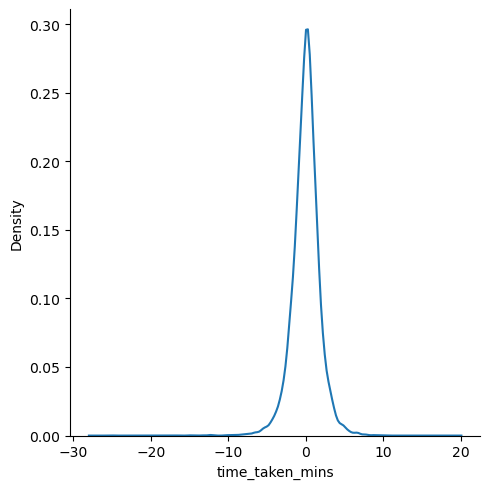

In [45]:
# distance plot
sns.displot(prediction - target_test,kind='kde')